In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
import warnings




In [13]:
# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nFirst 5 rows:")
df.head()


Number of rows: 43917
Number of columns: 32

First 5 rows:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


# New Section

In [14]:
# Generate summary statistics
print(" DATASET INFO ")
df.info()

print("\n SUMMARY STATISTICS ")
df.describe()


 DATASET INFO 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43917 entries, 0 to 43916
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           43917 non-null  object 
 1   is_canceled                     43917 non-null  int64  
 2   lead_time                       43917 non-null  int64  
 3   arrival_date_year               43917 non-null  int64  
 4   arrival_date_month              43917 non-null  object 
 5   arrival_date_week_number        43917 non-null  int64  
 6   arrival_date_day_of_month       43917 non-null  int64  
 7   stays_in_weekend_nights         43917 non-null  int64  
 8   stays_in_week_nights            43917 non-null  int64  
 9   adults                          43917 non-null  int64  
 10  children                        43913 non-null  float64
 11  babies                          43917 non-null  int64  
 12  meal             

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,43917.000000,43917.000000,43917.000000,43917.000000,43917.000000,43917.000000,43917.000000,43917.000000,43913.000000,43917.000000,43917.000000,43917.000000,43917.000000,43916.000000,35277.000000,3281.000000,43916.000000,43916.000000,43916.000000,43916.000000
mean,0.280506,88.742150,2016.022952,27.816495,15.758066,1.157912,3.033882,1.864540,0.122629,0.013230,0.040485,0.092789,0.133593,0.277894,197.293676,231.193539,0.529238,94.375236,0.127357,0.601717
std,0.449252,94.683435,0.759415,13.581790,8.793940,1.133818,2.404765,0.678095,0.435978,0.116037,0.197097,1.275464,0.957842,0.715734,104.238657,130.153945,7.237934,59.608794,0.339065,0.809859
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,10.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,135.000000,0.000000,52.500000,0.000000,0.000000
50%,0.000000,54.000000,2016.000000,30.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,76.670000,0.000000,0.000000
75%,1.000000,145.000000,2017.000000,38.000000,23.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,241.000000,308.000000,0.000000,121.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,20.000000,535.000000,543.000000,185.000000,508.000000,8.000000,5.000000


 MISSING VALUES ANALYSIS ===
                             Missing Count  Missing %
company                              40636  92.529089
agent                                 8640  19.673475
country                                464   1.056538
children                                 4   0.009108
booking_changes                          1   0.002277
deposit_type                             1   0.002277
days_in_waiting_list                     1   0.002277
customer_type                            1   0.002277
adr                                      1   0.002277
required_car_parking_spaces              1   0.002277
total_of_special_requests                1   0.002277
reservation_status                       1   0.002277
reservation_status_date                  1   0.002277


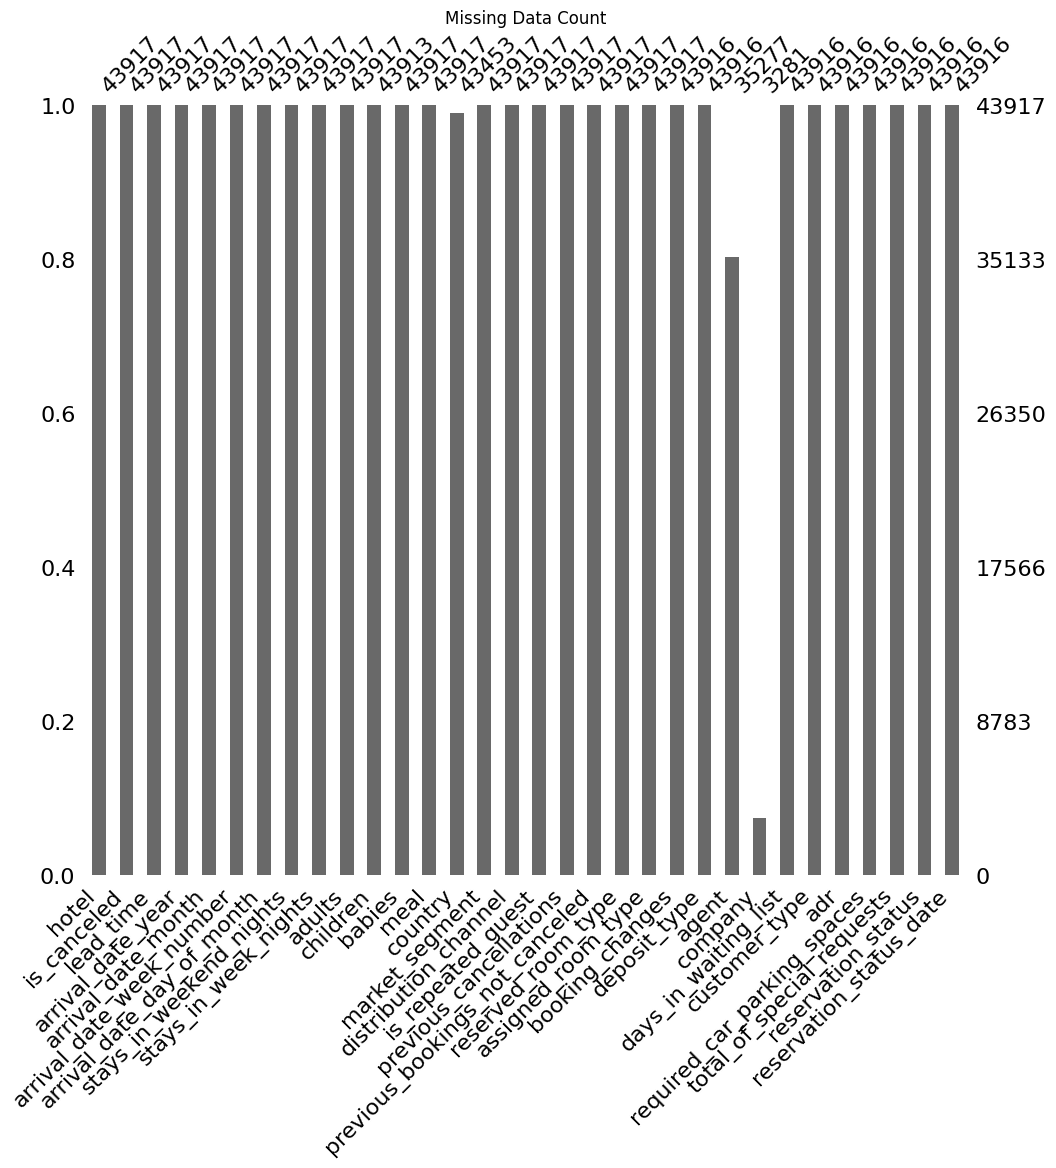

In [15]:


# 🔎 Missing values count + percentage
print(" MISSING VALUES ANALYSIS ===")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

summary = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_percent
})
summary = summary[summary["Missing Count"] > 0].sort_values("Missing Count", ascending=False)
print(summary)

# 🔎 Visualization
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 2)
msno.bar(df)
plt.title("Missing Data Count")

plt.show()


=== OUTLIER DETECTION ===


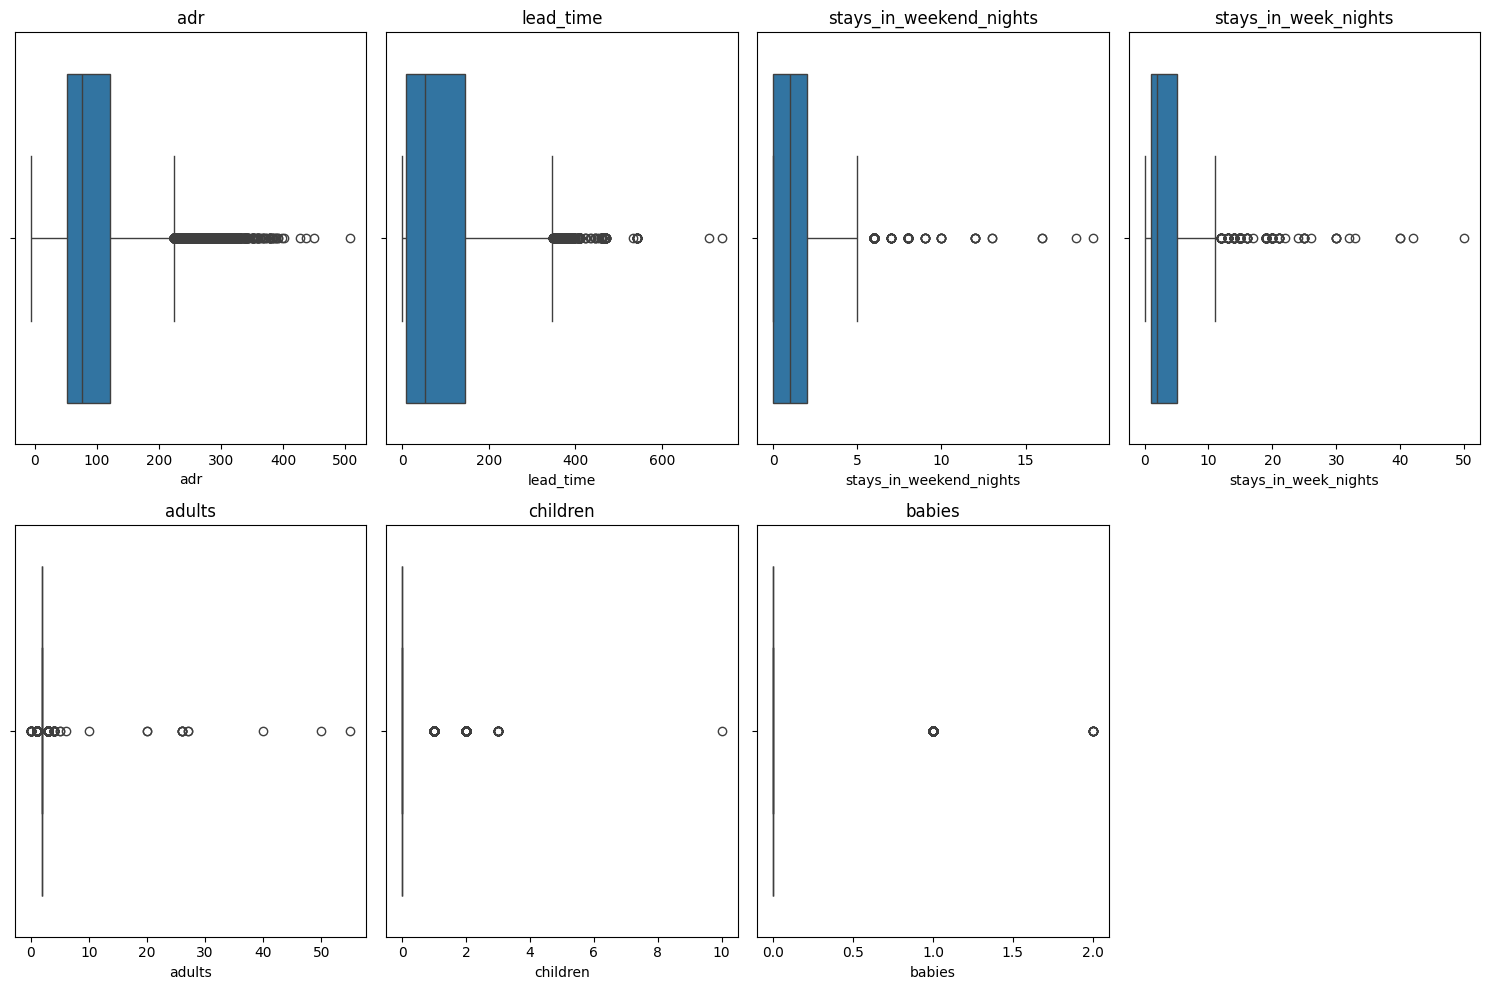


OUTLIER ANALYSIS USING IQR 

adr:
 - Range: [-50.25, 223.75]
 - Outliers: 1936 (4.41%)
 - Min: -6.38, Max: 508.00

lead_time:
 - Range: [-192.50, 347.50]
 - Outliers: 676 (1.54%)
 - Min: 0.00, Max: 737.00


In [16]:


print("=== OUTLIER DETECTION ===")

# 📊 Boxplots for main numerical columns
cols = ['adr', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
        'adults', 'children', 'babies']

plt.figure(figsize=(15, 10))
for i, c in enumerate(cols, 1):
    if c in df.columns:
        plt.subplot(2, 4, i)
        sns.boxplot(x=df[c])
        plt.title(c)
plt.tight_layout()
plt.show()

# 🔎 IQR method for adr & lead_time
print("\nOUTLIER ANALYSIS USING IQR ")
for col in ['adr', 'lead_time']:
    if col in df.columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]

        print(f"\n{col}:")
        print(f" - Range: [{lower:.2f}, {upper:.2f}]")
        print(f" - Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
        print(f" - Min: {df[col].min():.2f}, Max: {df[col].max():.2f}")


## Phase 1 Findings - Data Quality Issues

### Key Data Quality Issues Identified:

1. **Missing Values**:
   - `company`: High percentage of missing values
   - `agent`: High missing values  
   - `country`: Some missing values
   - `children`: Small number of missing values

2. **Outliers**:
   - `adr` (Average Daily Rate): Extreme values that may skew analysis
   - `lead_time`: Some very high lead times that may be outliers

3. **Data Types**: Need to verify and fix date columns

4. **Potential Data Leakage**: `reservation_status` and `reservation_status_date` columns contain future information

---

## Phase 2: Data Cleaning


In [17]:
# Create a copy of the original dataset for cleaning
df_clean = df.copy()

print(f"Original dataset shape: {df_clean.shape}")


# For company and agent: Replace missing values with "None"
df_clean['company'].fillna('None', inplace=True)
df_clean['agent'].fillna('None', inplace=True)

# For country: Impute with mode (most frequent country)
country_mode = df_clean['country'].mode()[0]
df_clean['country'].fillna(country_mode, inplace=True)
print(f" missing 'company' and 'agent' with 'None'")
print(f" Replaced missing 'country' with mode: {country_mode}")

# For children: Impute with median
children_median = df_clean['children'].median()
df_clean['children'].fillna(children_median, inplace=True)
print(f"   - Replaced missing 'children' with median: {children_median}")

# Check remaining missing values
remaining_missing = df_clean.isnull().sum().sum()
print(f"   - Remaining missing values: {remaining_missing}")

 # Remove Duplicates

duplicates_before = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates()
duplicates_after = df_clean.duplicated().sum()
print(f"   Duplicates found: {duplicates_before}")
print(f"   Duplicates removed: {duplicates_before - duplicates_after}")
print(f"   Remaining duplicates: {duplicates_after}")

print(f"\nDataset shape after missing value handling and duplicate removal: {df_clean.shape}")


Original dataset shape: (43917, 32)
 missing 'company' and 'agent' with 'None'
 Replaced missing 'country' with mode: PRT
   - Replaced missing 'children' with median: 0.0
   - Remaining missing values: 9


/tmp/ipython-input-107951719.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['company'].fillna('None', inplace=True)
/tmp/ipython-input-107951719.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_clean['company'].fillna('None', inplace=True)
/tmp/ipython-input-107951719.py:9: FutureWarning: A value is trying to be set on a copy of a

   Duplicates found: 7786
   Duplicates removed: 7786
   Remaining duplicates: 0

Dataset shape after missing value handling and duplicate removal: (36131, 32)


In [18]:
print("\n   HANDLING OUTLIERS ")

# ADR
adr_outliers = (df_clean['adr'] > 1000).sum()
df_clean['adr'] = df_clean['adr'].clip(upper=1000)
print(f" ADR capped at 1000 → {adr_outliers} values adjusted")

# Lead Time
lead_outliers = (df_clean['lead_time'] > 500).sum()
df_clean['lead_time'] = df_clean['lead_time'].clip(upper=500)
print(f" Lead Time capped at 500 → {lead_outliers} values adjusted")


print("\n FIXING DATA TYPES ")

# Reservation status date
if 'reservation_status_date' in df_clean.columns:
    df_clean['reservation_status_date'] = pd.to_datetime(
        df_clean['reservation_status_date'], errors='coerce'
    )
    print("Converted 'reservation_status_date' to datetime")

# Arrival date
cols = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
if all(c in df_clean.columns for c in cols):

    if df_clean['arrival_date_month'].dtype == 'O':
        df_clean['arrival_date_month'] = pd.to_datetime(
            df_clean['arrival_date_month'], format='%B'
        ).dt.month


    df_clean['arrival_date'] = pd.to_datetime({
        'year': df_clean['arrival_date_year'],
        'month': df_clean['arrival_date_month'],
        'day': df_clean['arrival_date_day_of_month']
    })
    print("Created 'arrival_date' column from year, month, and day")

print(f"\nFinal dataset shape: {df_clean.shape}")



   HANDLING OUTLIERS 
 ADR capped at 1000 → 0 values adjusted
 Lead Time capped at 500 → 20 values adjusted

 FIXING DATA TYPES 
Converted 'reservation_status_date' to datetime
Created 'arrival_date' column from year, month, and day

Final dataset shape: (36131, 33)


## Phase 3: Feature Engineering & Preprocessing


In [19]:


# 1. Create New Features
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
df_clean['total_nights'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']
df_clean['is_family'] = ((df_clean['children'] > 0) | (df_clean['babies'] > 0)).map({True: "Yes", False: "No"})
print(" Created new features: total_guests, total_nights, is_family")


 Created new features: total_guests, total_nights, is_family


In [20]:


# 2. Encode Categorical Variables
# Low-cardinality categorical features (few unique values)
low_cardinality = ['meal', 'market_segment', 'distribution_channel','reserved_room_type', 'deposit_type', 'customer_type', 'is_family']

low_cardinality = [col for col in low_cardinality if col in df_clean.columns]


# Apply One-Hot Encoding
df_clean = pd.get_dummies(df_clean, columns=low_cardinality, drop_first=True)
print(f" One-hot encoded {len(low_cardinality)} low-cardinality columns")

# High-cardinality feature: country
if 'country' in df_clean.columns:
    country_counts = df_clean['country'].value_counts()
    rare_countries = country_counts[country_counts < 50].index  # group rare countries
    df_clean['country'] = df_clean['country'].replace(rare_countries, 'Other')
    print("Grouped rare countries into 'Other'")
    df_clean = pd.get_dummies(df_clean, columns=['country'], drop_first=True)



 One-hot encoded 7 low-cardinality columns
Grouped rare countries into 'Other'


In [21]:

# 3. Remove Data Leakage

leakage_cols = ['reservation_status', 'reservation_status_date']
df_clean = df_clean.drop(columns=[col for col in leakage_cols if col in df_clean.columns])
print(" Dropped leakage columns: reservation_status, reservation_status_date")

 Dropped leakage columns: reservation_status, reservation_status_date


In [22]:

print("\n4. TRAIN-TEST SPLIT")

# Features & Target
X = df_clean.drop('is_canceled', axis=1)   # Features
y = df_clean['is_canceled']                # Target

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"  Dataset split completed")
print(f"   - Training set: {X_train.shape[0]} rows, {X_train.shape[1]} features")
print(f"   - Testing set : {X_test.shape[0]} rows, {X_test.shape[1]} features")

# Preview training data
print("\nSample of training features:")
display(X_train.head())

# Check target distribution
print("\nTarget Distribution (is_canceled) ")
print("Training set:")
print(y_train.value_counts(normalize=True).round(3) * 100)

print("\nTesting set:")
print(y_test.value_counts(normalize=True).round(3) * 100)



4. TRAIN-TEST SPLIT
  Dataset split completed
   - Training set: 28904 rows, 80 features
   - Testing set : 7227 rows, 80 features

Sample of training features:


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,country_MAR,country_NLD,country_NOR,country_Other,country_POL,country_PRT,country_ROU,country_RUS,country_SWE,country_USA
2912,Resort Hotel,27,2015,11,45,6,2,7,1,0.0,...,False,False,False,False,False,False,False,False,False,False
7534,Resort Hotel,85,2016,8,33,13,2,3,2,2.0,...,False,False,False,False,False,False,False,False,False,False
27682,Resort Hotel,15,2016,9,37,4,2,0,2,0.0,...,False,False,False,False,False,False,False,False,False,False
13805,Resort Hotel,2,2016,10,42,12,0,2,1,0.0,...,False,False,False,False,False,True,False,False,False,False
40046,Resort Hotel,208,2017,8,34,26,4,9,2,0.0,...,False,False,False,False,False,False,False,False,False,False



Target Distribution (is_canceled) 
Training set:
is_canceled
0    76.8
1    23.2
Name: proportion, dtype: float64

Testing set:
is_canceled
0    76.2
1    23.8
Name: proportion, dtype: float64
